<a href="https://colab.research.google.com/github/ShrutiJain456/Encrypted/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

2.  Import and read the dataset

In [3]:
df = pd.read_csv("/content/Dataset.txt", sep = '\t')

3. EDA

In [4]:
df.shape

(101180, 24)

Our dataset comprises of 101180 rows and 24 columns. Since the features are encrypted there is no need to read the column names. Lets observe the class distribution.

In [5]:
class_dist = df['C'].value_counts()
print(class_dist)

C
0    76353
1    24827
Name: count, dtype: int64


In [6]:
df.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


separate the date columns from numerical ones

In [7]:
df.drop('Index', axis=1, inplace=True)

In [8]:
df.isnull().sum()

,0
F1,0
F2,0
F3,0
F4,0
F5,0
F6,0
F7,0
F8,0
F9,0
F10,0


In [8]:
df.dtypes

,0
F1,float64
F2,float64
F3,float64
F4,float64
F5,int64
F6,int64
F7,int64
F8,int64
F9,int64
F10,int64


In [9]:
df_viz = df.copy()

In [29]:
from sklearn.feature_selection import mutual_info_classif

X_numeric = df_viz.select_dtypes(include=['float64', 'int64']).drop(['C'], axis = 1)

mi_scores = mutual_info_classif(X_numeric, df_viz['C'])
feature_importance = pd.Series(mi_scores, index=X_numeric.columns)

Text(0.5, 1.0, 'Feature Importance (Mutual Information)')

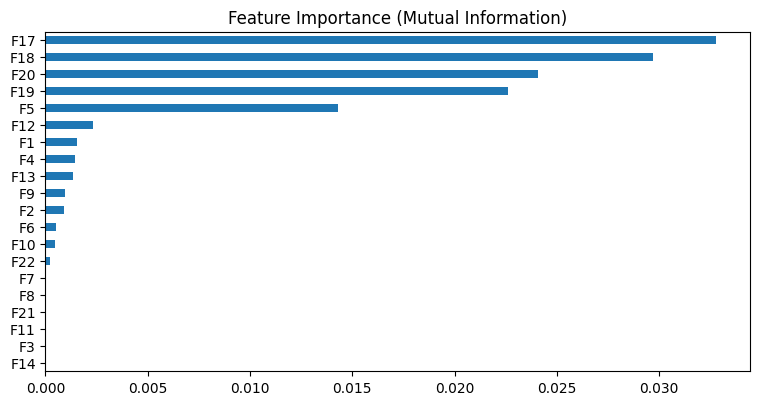

In [30]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 1)
feature_importance.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance (Mutual Information)')

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
df.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'C'],
      dtype='object')

In [14]:
X = df.drop(['C','F15', 'F16'],axis=1)
y = df['C']

In [15]:
key_feat = ['F17', 'F18', 'F19', 'F20']
pca_col = [col for col in X.columns if col not in key_feat]

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled[:, [X.columns.get_loc(f) for f in pca_col]])

In [18]:
X_combined = np.hstack([
    X_pca,
    X_scaled[:, [X.columns.get_loc(f) for f in key_feat]]
])

In [19]:
X_combined

array([[ 0.0670964 ,  0.06000994,  0.01158958, ..., -0.37966339,
         1.35127854, -0.34980204],
       [ 0.28819088, -0.84136215, -0.71256053, ..., -0.37966339,
         0.15181301, -0.77041081],
       [-1.93801816,  0.1690148 ,  1.72335849, ..., -0.37966339,
         1.33856335, -0.30731631],
       ...,
       [-1.30540083,  1.9720467 , -0.73228927, ..., -0.37966339,
         0.3722095 , -1.5563969 ],
       [-0.41631717, -0.83560591,  1.39539442, ..., -0.37966339,
        -0.83997121, -0.15436766],
       [-0.36484742,  1.11575104,  0.18359472, ..., -0.37966339,
         1.34280175, -0.8851223 ]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7499
              precision    recall  f1-score   support

           0       0.75      0.99      0.86     15216
           1       0.34      0.01      0.02      5020

    accuracy                           0.75     20236
   macro avg       0.55      0.50      0.44     20236
weighted avg       0.65      0.75      0.65     20236



In [28]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [32]:
!pip install xgboost==<compatible_version>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install xgboost==<compatible_version>'


In [34]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)


In [36]:
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:45:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [37]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [38]:
svm_preds = svm_model.predict(X_test)

In [46]:
svm_train_preds = svm_model.predict(X_train)
xgb_train_preds = xgb_model.predict(X_train)
rf_train_preds = clf.predict(X_train)

In [39]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    try:
        print("AUC-ROC:", roc_auc_score(y_true, y_pred))
    except:
        print("AUC-ROC: Not Applicable")


In [47]:
evaluate_model("SVM", y_train, svm_train_preds)
evaluate_model("XGBoost", y_train, xgb_train_preds)
evaluate_model("Random Forest", y_train, rf_train_preds)


SVM Performance:
Accuracy: 0.7552999604664954
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     61137
           1       0.00      0.00      0.00     19807

    accuracy                           0.76     80944
   macro avg       0.38      0.50      0.43     80944
weighted avg       0.57      0.76      0.65     80944

AUC-ROC: 0.5

XGBoost Performance:
Accuracy: 0.7596733544178691
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     61137
           1       0.96      0.02      0.04     19807

    accuracy                           0.76     80944
   macro avg       0.86      0.51      0.45     80944
weighted avg       0.81      0.76      0.66     80944

AUC-ROC: 0.5092263438671393

Random Forest Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
evaluate_model("SVM", y_test, svm_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model('RandomForest', y_test, y_pred)


SVM Performance:
Accuracy: 0.7519272583514529
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     15216
           1       0.00      0.00      0.00      5020

    accuracy                           0.75     20236
   macro avg       0.38      0.50      0.43     20236
weighted avg       0.57      0.75      0.65     20236

AUC-ROC: 0.5

XGBoost Performance:
Accuracy: 0.7511365882585491
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     15216
           1       0.34      0.00      0.01      5020

    accuracy                           0.75     20236
   macro avg       0.55      0.50      0.43     20236
weighted avg       0.65      0.75      0.65     20236

AUC-ROC: 0.5006088422335893

RandomForest Performance:
Accuracy: 0.749901166238387
Classification Report:
               precision    recall  f1-score   support

           0       0.75  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
df_test = pd.read_csv("/content/Dataset_test.txt", delimiter="\t")

In [43]:
X_test = df_test.drop(columns=["F15", "F16",'Index'], errors='ignore')
X_test_scaled = scaler.transform(X_test)

In [44]:
svm_test_preds = svm_model.predict(X_test_scaled)

xgb_test_preds = xgb_model.predict(X_test_scaled)

rf_test_preds = clf.predict(X_test_scaled)

In [48]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [53]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt']
}


In [54]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [55]:
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train_bal, y_train_bal)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100]},
             scoring='roc_auc', verbose=2)

In [56]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [57]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [67]:
bestrf_preds =  best_rf.predict(X_train)

In [58]:
rf_test_preds = best_rf.predict(X_test_scaled)

In [68]:
evaluate_model("Random Forest", y_train, bestrf_preds)


Random Forest Performance:
Accuracy: 0.5681582328523423
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.45      0.61     61137
           1       0.35      0.93      0.51     19807

    accuracy                           0.57     80944
   macro avg       0.65      0.69      0.56     80944
weighted avg       0.81      0.57      0.59     80944

AUC-ROC: 0.6910875684856799


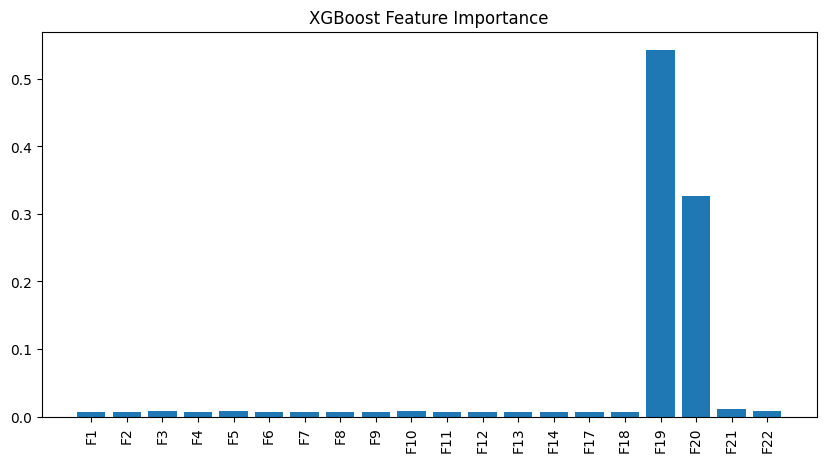

In [78]:
xgb_importance = xgb_model.feature_importances_

plt.figure(figsize=(10, 5))
plt.bar(range(len(xgb_importance)), xgb_importance, tick_label=X.columns)
plt.xticks(rotation=90)
plt.title("XGBoost Feature Importance")
plt.show()

In [79]:
import shap

100%|===================| 80853/80944 [05:44<00:00]       

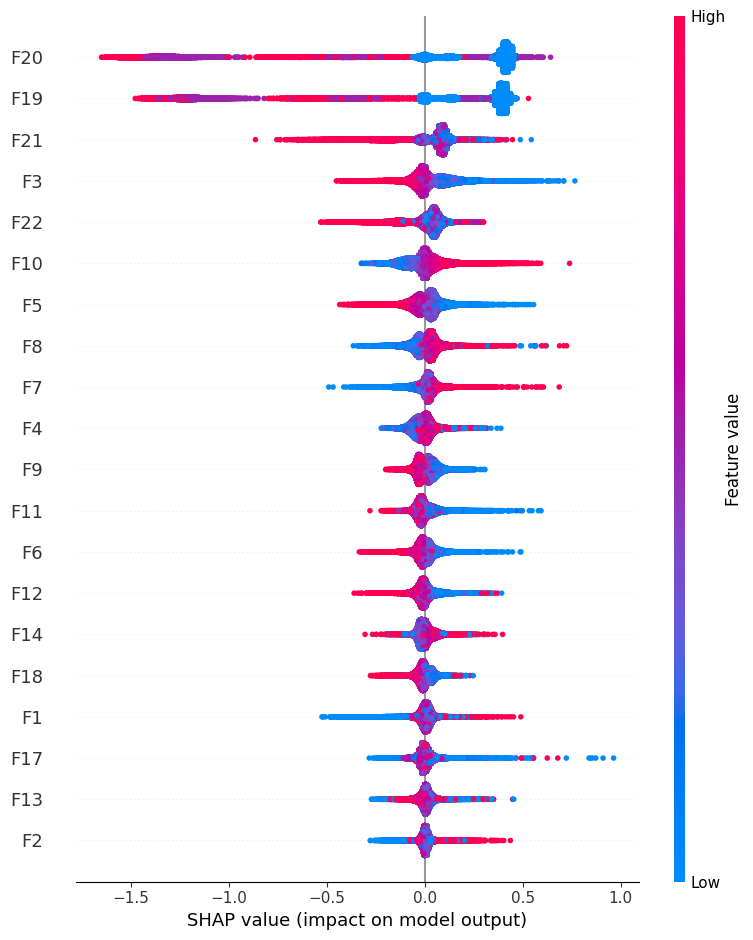

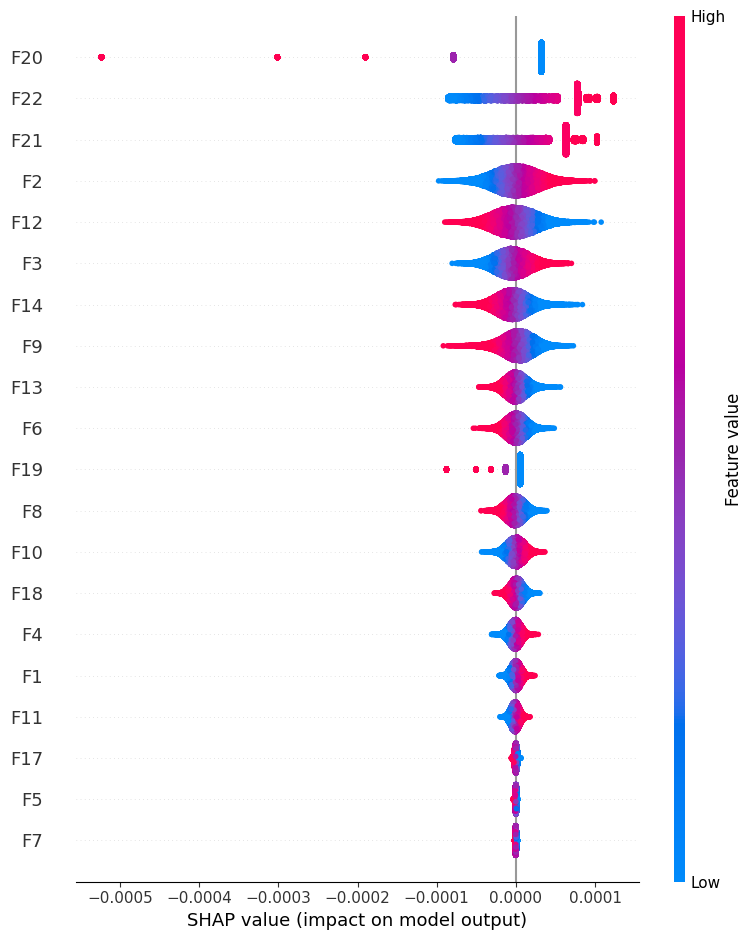

In [80]:
xgb_explainer = shap.Explainer(xgb_model, X_train)
xgb_shap_values = xgb_explainer(X_train)

svm_explainer = shap.Explainer(svm_model, X_train)
svm_shap_values = svm_explainer(X_train)

shap.summary_plot(xgb_shap_values, X_train, feature_names=X.columns)

shap.summary_plot(svm_shap_values, X_train, feature_names=X.columns)

In [60]:
def save_predictions(preds, filename):
    output = pd.DataFrame({"Index": df_test.index, "Class": preds})
    output.to_csv(filename, sep="\t", index=False)

In [73]:
save_predictions(svm_test_preds, "SVM_test_predictions.txt", df_test.index)
save_predictions(xgb_test_preds, "XGBoost_test_predictions.txt", df_test.index)
save_predictions(rf_test_preds, "RandomForest_test_predictions.txt", df_test.index)

In [77]:
save_predictions(xgb_train_preds, "XGBoost_train_predictions.txt", y_train.index)
